In [1]:
# Importing necessary libraries for data manipulation, visualization, and model building
import matplotlib.pyplot as plt  # For plotting graphs
from keras.layers import Dense, Flatten  # For creating neural network layers
from keras.models import Sequential  # For creating a sequential model
from keras.utils import to_categorical  # For converting labels to one-hot encoding
from keras.datasets import fashion_mnist  # For importing the Fashion MNIST dataset
from keras import utils  # For various utility functions


import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the necessary module from Keras
from keras.datasets import fashion_mnist

# Load the MNIST dataset, which is a dataset of fashion category
# x_train and y_train are the training data and labels respectively
# x_test and y_test are the testing data and labels respectively
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
# Display the shape of the y_test array
# y_test is the array containing the labels for the test dataset
# The shape attribute returns a tuple representing the dimensions of the array
# This is useful for understanding the structure and size of the test labels
print(y_test.shape)

(10000,)


In [4]:
# Display the shape of the x_train array
# x_train is the array containing the training data
# The shape attribute returns a tuple representing the dimensions of the array
# This helps to understand the number of training samples and their dimensions
print(x_train.shape)

(60000, 28, 28)


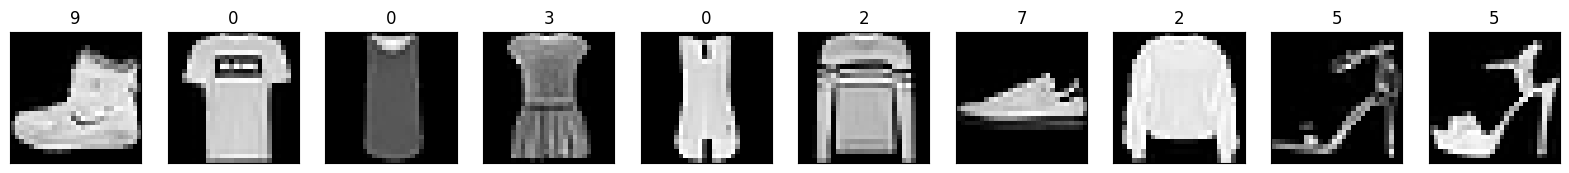

In [5]:
# Let's plot the first 10 images from the training dataset
# Create a figure and an array of subplots
# ncols=10: Specifies the number of columns in the subplot grid (10 columns)
# sharex=False: Determines whether the x-axis is shared among subplots (not shared)
# sharey=True: Determines whether the y-axis is shared among subplots (shared)
# figsize=(20, 4): Specifies the width and height of the figure in inches (20 inches wide, 4 inches tall)
fig, axes = plt.subplots(ncols=10, sharex=False, sharey=True, figsize=(20, 4))
# Loop through the first 10 images
for i in range(10):
    # Set the title of each subplot to the corresponding label in y_train
    axes[i].set_title(y_train[i])
    # Display each image in grayscale
    axes[i].imshow(x_train[i], cmap='gray')
    # Hide the x-axis
    axes[i].get_xaxis().set_visible(False)
    # Hide the y-axis
    axes[i].get_yaxis().set_visible(False)

# Show the plot
plt.show()

In [6]:
# Let's convert the labels to categorical format
# This code converts the labels into a one-hot encoded format with 10 dimensions
# Each label will be represented as a binary vector of length 10
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [7]:
# Let's check how the labels look after converting to categorical format
print(y_train)

[[0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [8]:
# Let's check the y_test labels to see how they look after conversion to categorical format
print(y_test)

[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [9]:
# Let's check the shape of the y_test array
# This provides information about the dimensions of the y_test array
print(y_test.shape)

(10000, 10)


In [10]:
# Define a Sequential model, which allows adding layers sequentially
model = Sequential()

# Add a Flatten layer to convert the 28x28 input images into a 1D array
# Input shape is set to (28, 28) representing the dimensions of the input images
model.add(Flatten(input_shape=(28, 28)))

# Add a Dense layer with 10 neurons and 'sigmoid' activation function
model.add(Dense(10, activation='sigmoid'))

# Add another Dense layer with 5 neurons and 'sigmoid' activation function
model.add(Dense(5, activation='sigmoid'))

# Add the output layer with 10 neurons (one for each class) and 'softmax' activation function
# Softmax is used for multi-class classification to output probabilities for each class
model.add(Dense(10, activation='softmax'))

In [11]:
# Display a summary of the model architecture, including the number of parameters in each layer
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 5)                 55        
                                                                 
 dense_2 (Dense)             (None, 10)                60        
                                                                 
Total params: 7965 (31.11 KB)
Trainable params: 7965 (31.11 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


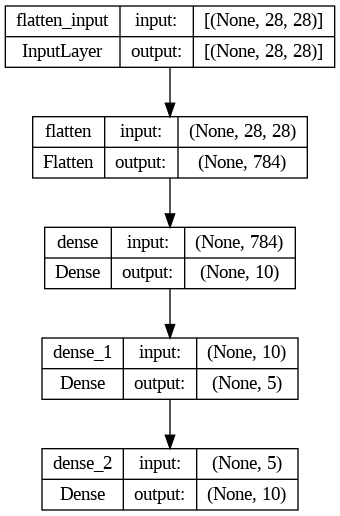

In [12]:
# Visualize the architecture of the model with its layer shapes
utils.plot_model(model, show_shapes=True)

In [13]:
# Compile the model with categorical crossentropy loss, Adam optimizer, and accuracy metric
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [14]:
# Train the model for one epoch on the training data and validate on the test data, storing the training history
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 15s 7ms/step - loss: 1.7859 - acc: 0.3917 - val_loss: 1.4773 - val_acc: 0.5375
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 1.3306 - acc: 0.5204 - val_loss: 1.2379 - val_acc: 0.5158
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1534 - acc: 0.5441 - val_loss: 1.0838 - val_acc: 0.5573
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0784 - acc: 0.5498 - val_loss: 1.0270 - val_acc: 0.5780
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0335 - acc: 0.5365 - val_loss: 1.0171 - val_acc: 0.5568
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0067 - acc: 0.5939 - val_loss: 0.9640 - val_acc: 0.6323
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.9382 - acc: 0.6180 - val_loss: 0.9774 - val_acc: 0.5848
Epoch 8/10
1875/1875 [==============================] - 4s 2

In [15]:
# Saving the trained model to a file named 'fashion_mnist_models.h5'
model.save('fashion_mnist_models.h5')

In [16]:
# Printing the training history containing the loss and accuracy metrics
print(history.history)

{'loss': [1.78590726852417, 1.3306095600128174, 1.1533503532409668, 1.0783555507659912, 1.0335243940353394, 1.0067099332809448, 0.9382287263870239, 0.9315649271011353, 0.9347240328788757, 0.8837279081344604], 'acc': [0.39168334007263184, 0.520383358001709, 0.5441333055496216, 0.5498166680335999, 0.5364999771118164, 0.5939333438873291, 0.6180166602134705, 0.6098333597183228, 0.6329833269119263, 0.6518666744232178], 'val_loss': [1.4773064851760864, 1.2379403114318848, 1.0838488340377808, 1.0269869565963745, 1.0171360969543457, 0.9639616012573242, 0.9773974418640137, 0.9510037302970886, 0.9327254891395569, 0.8799734115600586], 'val_acc': [0.5375000238418579, 0.5157999992370605, 0.5572999715805054, 0.578000009059906, 0.5568000078201294, 0.6323000192642212, 0.5848000049591064, 0.5979999899864197, 0.6083999872207642, 0.6567000150680542]}


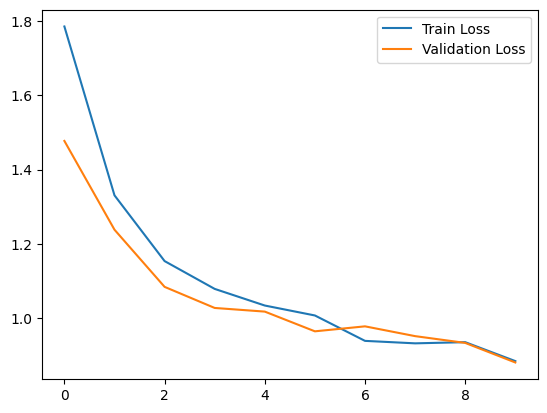

In [17]:
# Plotting the training loss curve
plt.plot(history.history['loss'], label='Train Loss')

# Plotting the validation loss curve
plt.plot(history.history['val_loss'], label='Validation Loss')

# Adding legend to the plot
plt.legend()

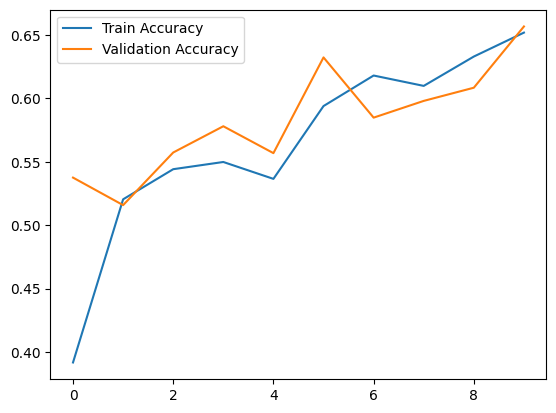

In [18]:
# Plotting the training accuracy curve
plt.plot(history.history['acc'], label='Train Accuracy')

# Plotting the validation accuracy curve
plt.plot(history.history['val_acc'], label='Validation Accuracy')

# Adding legend to the plot
plt.legend()

In [19]:
# Importing TensorFlow library
import tensorflow as tf

In [20]:
# Loading the pre-trained model from the file 'mnist_models_scifer.h5'
model = tf.keras.models.load_model('fashion_mnist_models.h5')

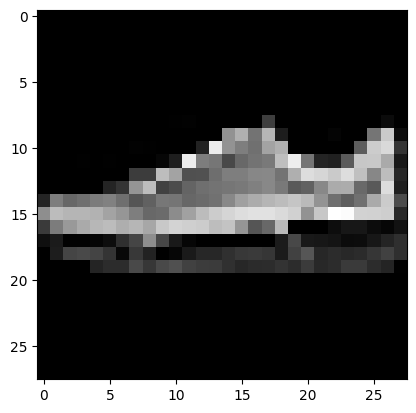

In [21]:
# Displaying the first test image from the dataset
plt.imshow(x_test[9], cmap='gray')

In [22]:
# Importing the NumPy library
import numpy as np

# Reshaping the first test image to match the model's input shape
x = np.reshape(x_test[9], (1, 28, 28))

# Using the trained model to predict the class label for the input image
predicted_label = np.argmax(model.predict(x))

# Printing the predicted class label
print(predicted_label)

1/1 [==============================] - 0s 96ms/step
7
